In [205]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 1, 1, 0]
w₂, b₂, w₃, b₃ = [randn(10, 2), randn(10, 1), randn(1, 10), randn(1, 1)]
η = 1e-2
σ(x) = 1 / (1 + exp(-x))
for _ in 1:60_000, (x, y) in zip(X, Y)
        a₂ = σ.(w₂*x + b₂)
        a₃ = σ.(w₃*a₂ + b₃)
        δ₃ = (a₃ .- y) .* (a₃ * (1 .- a₃))
        δ₂ = (w₃' * δ₃) .* (a₂ .* (1 .- a₂))
        w₂ -= η * δ₂*x'
        b₂ -= η * δ₂
        w₃ -= η * δ₃*a₂'
        b₃ -= η * δ₃
end

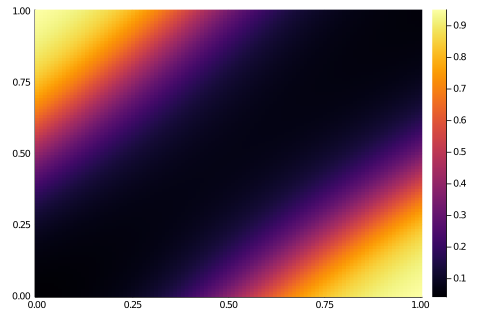

In [206]:
using Plots
display(heatmap(
    0:1e-2:1,
    0:1e-2:1,
    (x₁, x₂) -> sigma.(w₃*(sigma.(w₂*[x₁, x₂] + b₂))+b₃)[1],
    dpi=20
))